In [1]:
import os
os.chdir("Y:\Python\Mega_IT\F.Machine_Learning\연구과제")
os.getcwd()

'Y:\\Python\\Mega_IT\\F.Machine_Learning\\연구과제'

In [2]:
import sys
sys.path.append("Y:\Python\Mega_IT")

import warnings
warnings.filterwarnings('ignore')

from yjk_module.preprocessing import *
from yjk_module.ml_module import *

import matplotlib.pyplot as plt
import seaborn as sns

from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *
from hossam.regression import *

In [4]:
df = pd.read_csv("./data/추정매출_4.csv", encoding = 'euc-kr')

In [5]:
df.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,시군구_코드,시군구,서비스_업종_코드,서비스_업종_코드_명,...,시간대_이용률~17_매출_이용률,시간대_이용률~21_매출_이용률,시간대_이용률~24_매출_이용률,월요일_매출_이용률,화요일_매출_이용률,수요일_매출_이용률,목요일_매출_이용률,금요일_매출_이용률,토요일_매출_이용률,일요일_매출_이용률
0,2020,1,A,골목상권,1000022,창신2길,11110,종로구,CS200001,일반교습학원,...,0.000000,0.000091,0.000000,0.000000,0.000067,0.000035,0.000000,0.000000,0.000000,0.000000
1,2020,1,A,골목상권,1000001,계동길,11110,종로구,CS100001,한식음식점,...,0.017210,0.023995,0.003146,0.015610,0.015656,0.018404,0.016960,0.017966,0.012577,0.012124
2,2020,3,A,골목상권,1000127,광나루로12길,11215,광진구,CS200016,당구장,...,0.000000,0.000009,0.000012,0.000000,0.000000,0.000000,0.000010,0.000011,0.000000,0.000000
3,2020,1,A,골목상권,1000001,계동길,11110,종로구,CS100002,중식음식점,...,0.001293,0.002119,0.000000,0.000999,0.001222,0.001475,0.001182,0.001269,0.000855,0.001421
4,2020,1,A,골목상권,1000001,계동길,11110,종로구,CS100003,일식음식점,...,0.000731,0.001540,0.002198,0.000982,0.001266,0.001188,0.001232,0.001229,0.001520,0.000000


In [6]:
df_pop_living = pd.read_csv("./data/생활인구_2.csv", encoding = "euc-kr")

In [7]:
df_pop_living.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_생활인구_수,남성_생활인구_수,여성_생활인구_수,연령대_10_생활인구_수,...,시간대_4_생활인구_수,시간대_5_생활인구_수,시간대_6_생활인구_수,월요일_생활인구_수,화요일_생활인구_수,수요일_생활인구_수,목요일_생활인구_수,금요일_생활인구_수,토요일_생활인구_수,일요일_생활인구_수
0,2020,4,A,골목상권,1000117,왕십리로21길,4561311,2056753,2504559,845867,...,533250,784407,604050,648845,646111,650805,646547,646068,654286,668648
1,2020,4,A,골목상권,1000524,목동중앙로13나길,660691,328812,331879,137377,...,65152,89426,84315,94097,93805,93967,93384,93114,95406,96915
2,2020,4,A,골목상권,1000101,무학봉길,5400680,2403400,2997281,982593,...,598862,880050,721641,762079,758941,762953,762620,762064,783779,808245
3,2020,4,A,골목상권,1000777,장승배기로27길,4587594,2371403,2216192,369252,...,571498,776227,570044,665898,671619,673444,663364,658130,635193,619947
4,2020,4,A,골목상권,1000530,목동중앙서로8가길,3339989,1529026,1810963,649104,...,384579,559582,440438,472494,467297,466069,468967,475175,494930,495056


In [8]:
df_pop_work = pd.read_csv("./data/직장인구.csv", encoding = 'euc-kr')

In [9]:
df_pop_work.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
0,2018,4,A,골목상권,1000159,자양로15길,6423,4133,2290,20,...,702,1241,1269,601,10,490,489,519,548,234
1,2018,4,A,골목상권,1000934,일원로9길,8245,2229,6016,2,...,727,537,385,229,2,1997,2093,1153,601,170
2,2018,4,A,골목상권,1000819,신림로48길,825,344,481,0,...,72,73,83,78,0,96,99,109,115,62
3,2018,4,A,골목상권,1000797,남부순환로161길,2836,1575,1261,2,...,364,437,354,309,0,197,311,300,308,145
4,2018,4,A,골목상권,1000692,대림로22길,2779,1349,1430,9,...,218,314,330,384,6,294,271,329,326,204


In [10]:
df_fac = pd.read_csv("./data/집객시설_2.csv", encoding = 'euc-kr')

In [11]:
df_fac.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,행정동_코드,동명,집객시설_수,관공서_수,...,고등학교_수,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,버스_터미널_수,지하철_역_수,버스_정거장_수
0,2020,4,A,골목상권,1000012,옥인길,11110515,종로구,95,2.0,...,1.0,7.0,NaN,NaN,8.0,25.0,NaN,NaN,NaN,11
1,2020,3,A,골목상권,1000012,옥인길,11110515,종로구,95,2.0,...,1.0,7.0,NaN,NaN,8.0,25.0,NaN,NaN,NaN,11
2,2020,2,A,골목상권,1000012,옥인길,11110515,종로구,95,2.0,...,1.0,7.0,NaN,NaN,8.0,25.0,NaN,NaN,NaN,11
3,2020,1,A,골목상권,1000012,옥인길,11110515,종로구,95,2.0,...,1.0,7.0,NaN,NaN,8.0,25.0,NaN,NaN,NaN,11
4,2019,4,A,골목상권,1000012,옥인길,11110515,종로구,95,2.0,...,1.0,7.0,NaN,NaN,8.0,25.0,NaN,NaN,NaN,11


In [12]:
df.shape

(318807, 57)

In [13]:
df_tmp = pd.read_csv("./data/서울시 우리마을가게 상권분석서비스(상권영역).csv", encoding = 'euc-kr')

In [14]:
df_tmp.shape

(1010, 10)

In [15]:
df_tmp.head()

,기준_년월_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,형태정보
0,201810,A,골목상권,1000334,삼양로93길,201388,459892,11305,11305660,NaN
1,201810,A,골목상권,1000354,덕릉로60길,203646,459682,11320,11320513,NaN
2,201810,A,골목상권,1000355,도당로13가길,203280,463008,11320,11320700,NaN
3,201810,A,골목상권,1000356,도당로13바길,203102,463080,11320,11320700,NaN
4,201810,A,골목상권,1000357,도당로19길,203494,463290,11320,11320690,NaN


In [16]:
# df_tmp2 = pd.merge(left = df, right = df_pop_living, how = 'inner',
#                    on = ['기준_년_코드', '기준_분기_코드', '상권_코드', '상권_구분_코드_명', '상권_구분_코드', '상권_코드_명'])

In [17]:
# df_tmp2.shape

In [18]:
df_tmp3 = pd.merge(left = df, right = df_pop_work, how = 'inner',
                   on = ['기준_년_코드', '기준_분기_코드', '상권_코드', '상권_구분_코드_명', '상권_구분_코드', '상권_코드_명'])

In [19]:
df_tmp3.shape

(318807, 78)

In [20]:
df_fac.fillna(0, inplace = True)

In [21]:
df_tmp4 = pd.merge(left = df_tmp3, right = df_fac, how = 'inner',
                   on = ['기준_년_코드', '기준_분기_코드', '상권_코드', '상권_구분_코드_명', '상권_구분_코드', '상권_코드_명'])

In [22]:
df_tmp4.shape

(318807, 99)

In [23]:
cat_cols = ['기준_년_코드', '기준_분기_코드', '상권_코드', '서비스_업종_코드']
del_cols = ['상권_구분_코드', '상권_구분_코드_명', '상권_코드_명', '서비스_업종_코드_명']

In [24]:
# for i in cat_cols:
#     df_tmp4[i] = df_tmp4[i].astype('category')
# df_tmp4.drop(cat_cols, axis = 1, inplace = True)
# df_tmp4.drop(del_cols, axis = 1, inplace = True)

In [25]:
df_tmp4.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,시군구_코드,시군구,서비스_업종_코드,서비스_업종_코드_명,...,고등학교_수,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,버스_터미널_수,지하철_역_수,버스_정거장_수
0,2020,1,A,골목상권,1000022,창신2길,11110,종로구,CS200001,일반교습학원,...,0.0,0.0,0.0,2.0,3.0,17.0,0.0,0.0,2.0,11
1,2020,1,A,골목상권,1000022,창신2길,11110,종로구,CS100001,한식음식점,...,0.0,0.0,0.0,2.0,3.0,17.0,0.0,0.0,2.0,11
2,2020,1,A,골목상권,1000022,창신2길,11110,종로구,CS100002,중식음식점,...,0.0,0.0,0.0,2.0,3.0,17.0,0.0,0.0,2.0,11
3,2020,1,A,골목상권,1000022,창신2길,11110,종로구,CS100008,분식전문점,...,0.0,0.0,0.0,2.0,3.0,17.0,0.0,0.0,2.0,11
4,2020,1,A,골목상권,1000022,창신2길,11110,종로구,CS100009,호프-간이주점,...,0.0,0.0,0.0,2.0,3.0,17.0,0.0,0.0,2.0,11


In [26]:
x_train, x_test, y_train, y_test = my_train_test_split(df, yname = '분기당_매출_금액', test_size = 0.2, random_state = 0)

In [27]:
train = pd.concat([x_train, y_train], axis = 1)

In [28]:
sum_df = train.groupby('서비스_업종_코드').sum(numeric_only = True)
sum_area = train.groupby('시군구_코드').sum(numeric_only = True)

In [29]:
atv = sum_df['분기당_매출_금액'] / sum_df['분기당_매출_건수']
atv_area = sum_area['분기당_매출_금액'] / sum_area['분기당_매출_건수']

In [30]:
# x_train['ATV'] = x_train['서비스_업종_코드'].apply(lambda x : atv[x])
# x_test['ATV'] = x_test['서비스_업종_코드'].apply(lambda x : atv[x])

df['ATV_업종'] = df['서비스_업종_코드'].apply(lambda x : atv[x])
df['ATV_지역'] = df['시군구_코드'].apply(lambda x : atv_area[x])

In [31]:
df.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,시군구_코드,시군구,서비스_업종_코드,서비스_업종_코드_명,...,시간대_이용률~24_매출_이용률,월요일_매출_이용률,화요일_매출_이용률,수요일_매출_이용률,목요일_매출_이용률,금요일_매출_이용률,토요일_매출_이용률,일요일_매출_이용률,ATV_업종,ATV_지역
0,2020,1,A,골목상권,1000022,창신2길,11110,종로구,CS200001,일반교습학원,...,0.000000,0.000000,0.000067,0.000035,0.000000,0.000000,0.000000,0.000000,178503.372783,13121.862254
1,2020,1,A,골목상권,1000001,계동길,11110,종로구,CS100001,한식음식점,...,0.003146,0.015610,0.015656,0.018404,0.016960,0.017966,0.012577,0.012124,17381.278329,13121.862254
2,2020,3,A,골목상권,1000127,광나루로12길,11215,광진구,CS200016,당구장,...,0.000012,0.000000,0.000000,0.000000,0.000010,0.000011,0.000000,0.000000,14858.786398,12734.259901
3,2020,1,A,골목상권,1000001,계동길,11110,종로구,CS100002,중식음식점,...,0.000000,0.000999,0.001222,0.001475,0.001182,0.001269,0.000855,0.001421,20430.663306,13121.862254
4,2020,1,A,골목상권,1000001,계동길,11110,종로구,CS100003,일식음식점,...,0.002198,0.000982,0.001266,0.001188,0.001232,0.001229,0.001520,0.000000,33732.537011,13121.862254


In [32]:
to_categorical = ["기준_년_코드", "기준_분기_코드"]
del_cols = ["상권_구분_코드", "상권_구분_코드_명", "상권_코드", "상권_코드_명", "서비스_업종_코드", "시군구_코드"]

In [33]:
df['Covid'] = 0
idx = df.query('기준_년_코드 >= 2020 and 기준_분기_코드 > 2').index
df.loc[idx, 'Covid'] = 1
df['Covid'] = df['Covid'].astype('category')

In [34]:
for i in to_categorical:
    df[i] = df[i].astype("category")

df2 = df.drop(del_cols, axis = 1)

In [35]:
df2.head()

,기준_년_코드,기준_분기_코드,시군구,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,...,월요일_매출_이용률,화요일_매출_이용률,수요일_매출_이용률,목요일_매출_이용률,금요일_매출_이용률,토요일_매출_이용률,일요일_매출_이용률,ATV_업종,ATV_지역,Covid
0,2020,1,종로구,일반교습학원,22367209,82,82,0,0,54,...,0.000000,0.000067,0.000035,0.000000,0.000000,0.000000,0.000000,178503.372783,13121.862254,0
1,2020,1,종로구,한식음식점,431442455,18548,15115,3433,2750,2882,...,0.015610,0.015656,0.018404,0.016960,0.017966,0.012577,0.012124,17381.278329,13121.862254,0
2,2020,3,광진구,당구장,424034,17,17,0,0,0,...,0.000000,0.000000,0.000000,0.000010,0.000011,0.000000,0.000000,14858.786398,12734.259901,1
3,2020,1,종로구,중식음식점,25767161,1413,1099,314,176,225,...,0.000999,0.001222,0.001475,0.001182,0.001269,0.000855,0.001421,20430.663306,13121.862254,0
4,2020,1,종로구,일식음식점,55484866,1272,1055,217,173,233,...,0.000982,0.001266,0.001188,0.001232,0.001229,0.001520,0.000000,33732.537011,13121.862254,0


In [36]:
days_del = ['월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율',
       '목요일_매출_비율', '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율']
timeline_del = ['시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율']
age_del = ['연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율']
del_cols = ['주중_매출_비율', '주말_매출_비율', '남성_매출_비율', '여성_매출_비율']


days_li = ['월요일_매출_건수',
       '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수',
       '일요일_매출_건수']
timeline_li = ['시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수',
       '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수']
age_li = ['연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수',
       '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']

In [37]:
df3 = df2.copy()

In [38]:
df3["max_days"] = df3[days_li].to_numpy().argmax(axis = 1)
df3["max_timeline"] = df3[timeline_li].to_numpy().argmax(axis = 1)
df3["max_age"] = df3[age_li].to_numpy().argmax(axis = 1)

In [39]:
days_map = {0 : "월요일", 1 : "화요일", 2 : "수요일", 3 : "목요일", 4 : "금요일", 5 : "토요일", 6 : "일요일"}
timeline_map = {0 : '0~6', 1 : "7~11", 2 : '12~14', 3 : '15~17', 4 : '18~21', 5 : '22~24'}
age_map = {0 : "10대", 1: "20대", 2: "30대", 3: "40대", 4 :"50대", 5: "60대이상"}

In [40]:
df3["max_days"] = df3["max_days"].map(days_map)
df3["max_timeline"] = df3["max_timeline"].map(timeline_map)
df3["max_age"] = df3["max_age"].map(age_map)

df3.drop(days_li + timeline_li + age_li, axis = 1, inplace = True)

In [41]:
df3.head()

,기준_년_코드,기준_분기_코드,시군구,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_건수,주말_매출_건수,남성_매출_건수,여성_매출_건수,...,목요일_매출_이용률,금요일_매출_이용률,토요일_매출_이용률,일요일_매출_이용률,ATV_업종,ATV_지역,Covid,max_days,max_timeline,max_age
0,2020,1,종로구,일반교습학원,22367209,82,82,0,54,28,...,0.000000,0.000000,0.000000,0.000000,178503.372783,13121.862254,0,화요일,18~21,40대
1,2020,1,종로구,한식음식점,431442455,18548,15115,3433,8752,7776,...,0.016960,0.017966,0.012577,0.012124,17381.278329,13121.862254,0,수요일,12~14,30대
2,2020,3,광진구,당구장,424034,17,17,0,17,0,...,0.000010,0.000011,0.000000,0.000000,14858.786398,12734.259901,1,금요일,22~24,30대
3,2020,1,종로구,중식음식점,25767161,1413,1099,314,592,694,...,0.001182,0.001269,0.000855,0.001421,20430.663306,13121.862254,0,수요일,12~14,20대
4,2020,1,종로구,일식음식점,55484866,1272,1055,217,622,508,...,0.001232,0.001229,0.001520,0.000000,33732.537011,13121.862254,0,화요일,12~14,50대


In [42]:
tmp_0 = df3[df3['Covid'] == 0]
tmp_1 = df3[df3['Covid'] == 1]

In [43]:
tmp = tmp_0['max_days'].value_counts(normalize = True)
tmp

max_days
토요일    0.249875
월요일    0.183226
금요일    0.146742
화요일    0.117361
수요일    0.104579
일요일    0.101499
목요일    0.096717
Name: proportion, dtype: float64

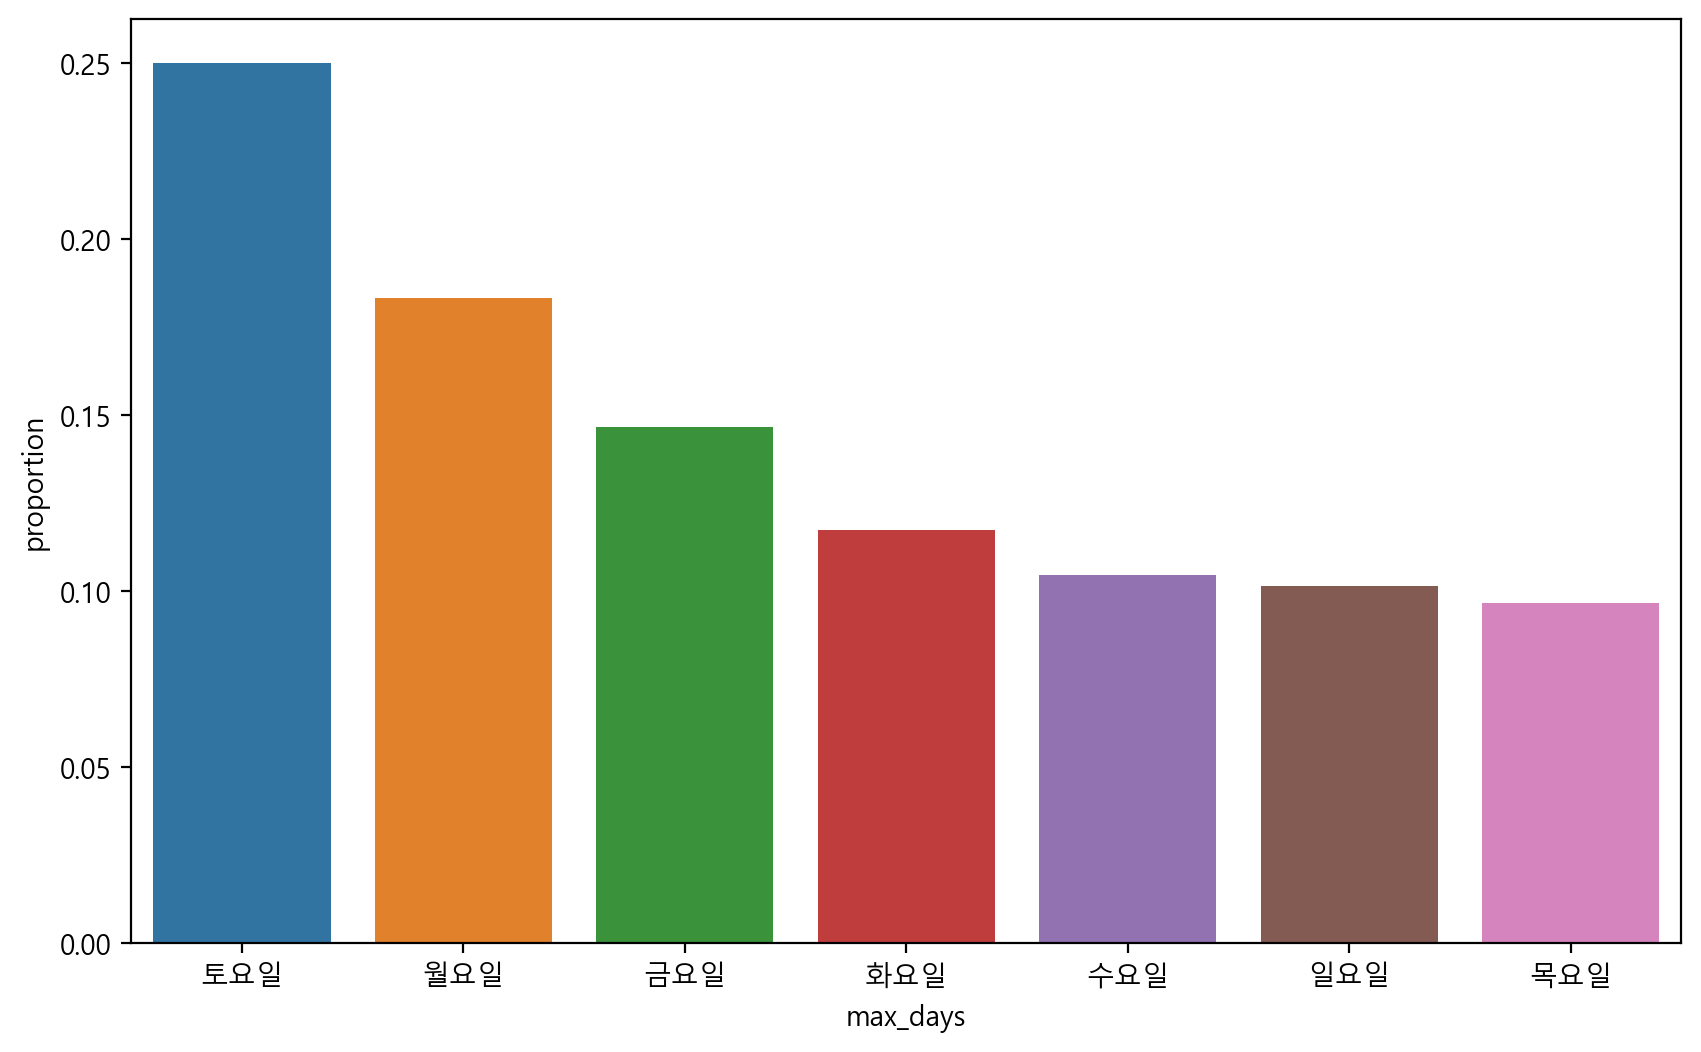

In [44]:
plt.figure()
sns.barplot(y = tmp, x = tmp.index)
plt.show()

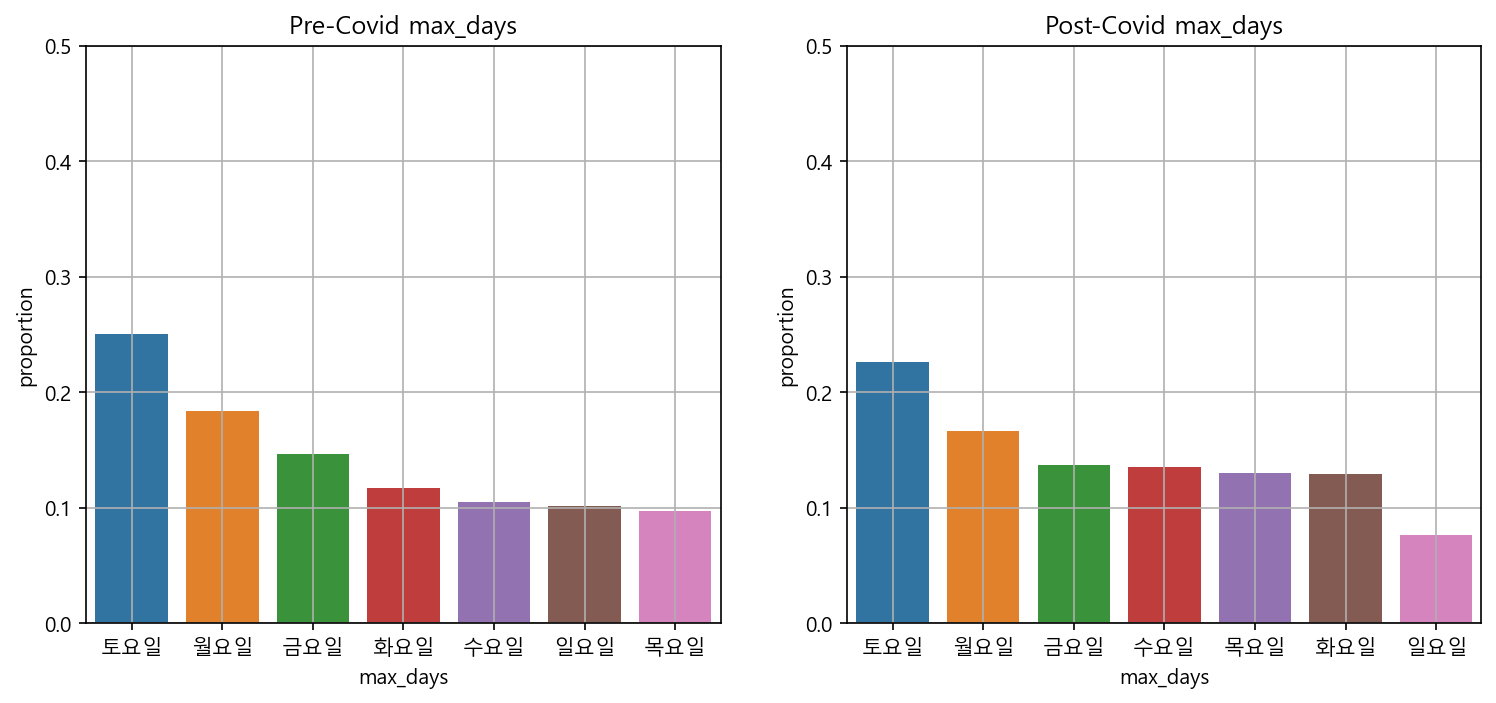

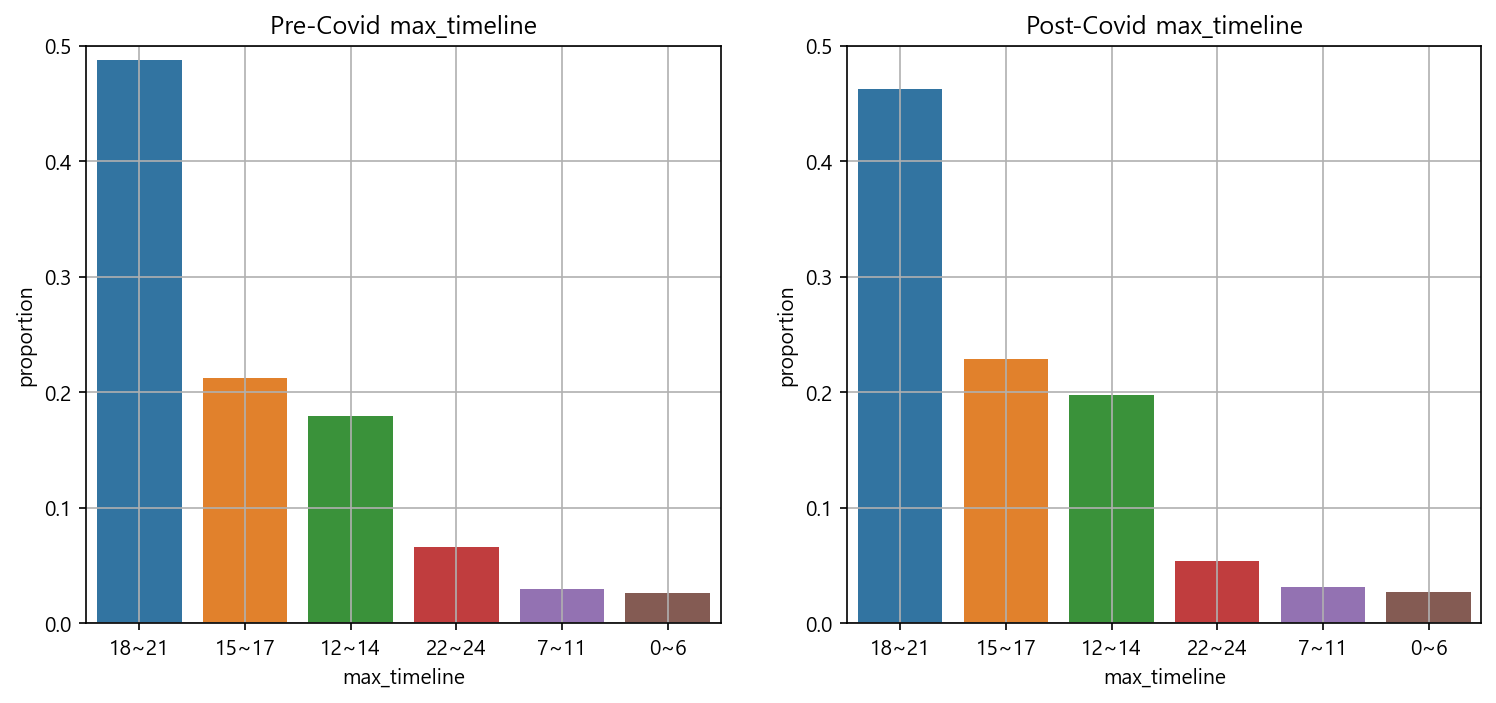

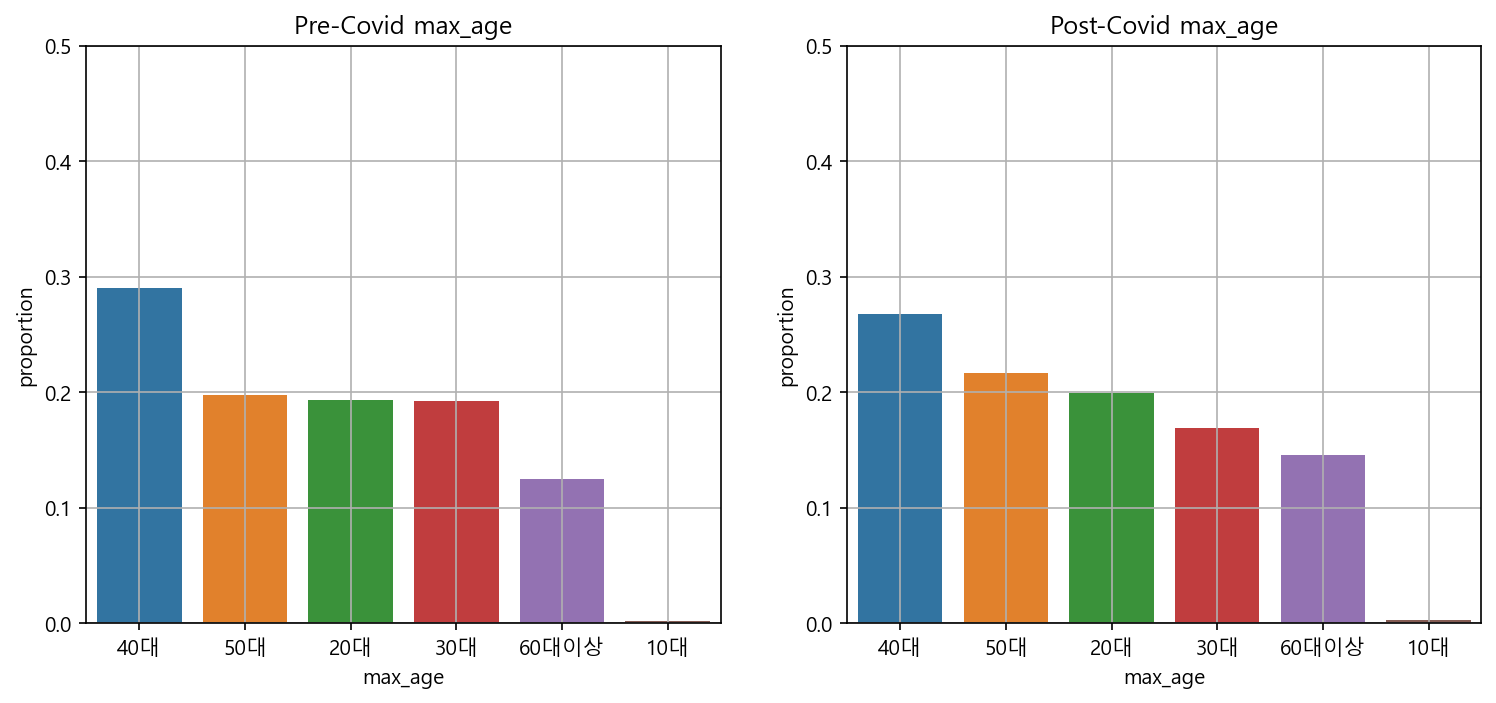

In [45]:
plot_cols = ['max_days', 'max_timeline', 'max_age']

tmp_0 = df3[df3['Covid'] == 0]
tmp_1 = df3[df3['Covid'] == 1]

for i in plot_cols:
    fig, ax = plt.subplots(1, 2, figsize = (12, 5), dpi = 150)
    tmp_0i = tmp_0[i].value_counts(normalize = True)
    tmp_1i = tmp_1[i].value_counts(normalize = True)
    
    sns.barplot(y = tmp_0i, x = tmp_0i.index, ax = ax[0])
    sns.barplot(y = tmp_1i, x = tmp_1i.index, ax = ax[1])

    ax[0].set_title(f"Pre-Covid {i}")
    ax[1].set_title(f"Post-Covid {i}")

    ax[0].set_ylim(0, 0.5)
    ax[1].set_ylim(0, 0.5)

    ax[0].grid(True)
    ax[1].grid(True)
    plt.show()

In [46]:
df4 = df3.drop('서비스_업종_코드_명', axis = 1)
df4['분기당_매출_금액'] = np.log10(df4['분기당_매출_금액'])

In [47]:
pp = YjkPreprocessor()
pp.set_strategy(outline = None, null = None)

아래와 같이 처리합니다.
+-------------+----------------+
| 범주        | 처리방법       |
|-------------+----------------|
| 이상치 처리 | 처리하지 않음  |
| 결측치 처리 | 처리하지 않음  |
| 스케일러    | StandardScaler |
| 인코딩      | 원핫인코딩     |
+-------------+----------------+


In [48]:
df_p = pp.fit_transform(df4, yname = '분기당_매출_금액')

데이터프레임 크기 : (318807, 37)
데이터프레임에 결측치는 없습니다.
연속형 데이터 컬럼 : ['분기당_매출_건수', '주중_매출_건수', '주말_매출_건수', '남성_매출_건수', '여성_매출_건수', '점포수', '남성_매출_이용률', '여성_매출_이용률', '연령대_10_매출_이용률', '연령대_20_매출_이용률', '연령대_30_매출_이용률', '연령대_40_매출_이용률', '연령대_50_매출_이용률', '연령대_60_이상_매출_이용률', '시간대_이용률~06_매출_이용률', '시간대_이용률~11_매출_이용률', '시간대_이용률~14_매출_이용률', '시간대_이용률~17_매출_이용률', '시간대_이용률~21_매출_이용률', '시간대_이용률~24_매출_이용률', '월요일_매출_이용률', '화요일_매출_이용률', '수요일_매출_이용률', '목요일_매출_이용률', '금요일_매출_이용률', '토요일_매출_이용률', '일요일_매출_이용률', 'ATV_업종', 'ATV_지역'], 총 29개
명목형 데이터 컬럼 : ['기준_년_코드', '기준_분기_코드', '시군구', 'Covid', 'max_days', 'max_timeline', 'max_age'], 총 7개
종속변수 컬럼명 : 분기당_매출_금액 / 종속변수 라벨링 여부 : False


In [49]:
x_train, x_test, y_train, y_test = my_train_test_split(df_p, yname = '분기당_매출_금액', random_state = 0, test_size = 0.2)
x_train.shape, x_test.shape, y_train.shape, y_train.shape

((255045, 83), (63762, 83), (255045,), (255045,))

In [50]:
support = YjkRegressorSupport()

사용 가능한 모델 : ['LinearRegressor', 'Ridge', 'Lasso', 'SGDRegressor', 'KneighborsRegressor', 'LinearSVR', 'SVR', 'DecisionTreeRegressor', 'CatBoostRegressor']


In [51]:
dt = support.call_model("DecisionTreeRegressor")

[DecisionTreeRegressor의 파라미터]
+-------------------+---------------------------------------------------------------------------------+----------------------------------------------------------------+
| 파라미터명        | 파라미터 노트                                                                   | 파라미터 범위                                                  |
|-------------------+---------------------------------------------------------------------------------+----------------------------------------------------------------|
| criterion         | 노드 분할의 기준, gini는 지니 불순도, entropy는 정보 이득을 사용                | ['friedman_mse', 'squared_error', 'absolute_error', 'poisson'] |
| splitter          | 각 노드에서 분할을 선택하는 방식, best는 최선의 분할을 찾으며 random은 무작위   | ['best', 'random']                                             |
| max_depth         | 나무의 깊이                                                                     | [None, 3, 5, 7, 10, 20, 30]                                    |
| min_samples_split | 노드를 분

In [52]:
dt.set_params(max_depth = 7, min_samples_split = 5, min_samples_leaf = 2)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=2, min_samples_split=5,
                      random_state=0)

In [53]:
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=2, min_samples_split=5,
                      random_state=0)

In [54]:
x_train.columns

Index(['분기당_매출_건수', '주중_매출_건수', '주말_매출_건수', '남성_매출_건수', '여성_매출_건수', '점포수',
       '남성_매출_이용률', '여성_매출_이용률', '연령대_10_매출_이용률', '연령대_20_매출_이용률',
       '연령대_30_매출_이용률', '연령대_40_매출_이용률', '연령대_50_매출_이용률', '연령대_60_이상_매출_이용률',
       '시간대_이용률~06_매출_이용률', '시간대_이용률~11_매출_이용률', '시간대_이용률~14_매출_이용률',
       '시간대_이용률~17_매출_이용률', '시간대_이용률~21_매출_이용률', '시간대_이용률~24_매출_이용률',
       '월요일_매출_이용률', '화요일_매출_이용률', '수요일_매출_이용률', '목요일_매출_이용률', '금요일_매출_이용률',
       '토요일_매출_이용률', '일요일_매출_이용률', 'ATV_업종', 'ATV_지역', '기준_년_코드_2018',
       '기준_년_코드_2019', '기준_년_코드_2020', '기준_년_코드_2021', '기준_분기_코드_1',
       '기준_분기_코드_2', '기준_분기_코드_3', '기준_분기_코드_4', '시군구_강남구', '시군구_강동구',
       '시군구_강북구', '시군구_강서구', '시군구_관악구', '시군구_광진구', '시군구_구로구', '시군구_금천구',
       '시군구_노원구', '시군구_도봉구', '시군구_동대문구', '시군구_동작구', '시군구_마포구', '시군구_서대문구',
       '시군구_서초구', '시군구_성동구', '시군구_성북구', '시군구_송파구', '시군구_양천구', '시군구_영등포구',
       '시군구_용산구', '시군구_은평구', '시군구_종로구', '시군구_중구', '시군구_중랑구', 'Covid_0',
       'Covid_1', 'max_days_금요일', 'max_days_목요일', 'max_day

In [55]:
dt.feature_importances_

array([1.59396188e-01, 6.94286435e-01, 5.92408590e-04, 3.20528342e-04,
       3.19672763e-03, 3.36028769e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.07478667e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.12064934e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.38130558e-04, 1.33441189e-01,
       1.96801298e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.07872207e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [56]:
tops = pd.Series(dt.feature_importances_).sort_values(ascending = False)
tops.head(10)

1     0.694286
0     0.159396
27    0.133441
9     0.004075
5     0.003360
4     0.003197
2     0.000592
26    0.000538
3     0.000321
37    0.000308
dtype: float64

In [57]:
for i in tops.index:
    print("Feature Importance :", "%.4f" % tops[i], "컬럼명 :", x_train.columns[i])
    if tops[i] == 0:
        break

Feature Importance : 0.6943 컬럼명 : 주중_매출_건수
Feature Importance : 0.1594 컬럼명 : 분기당_매출_건수
Feature Importance : 0.1334 컬럼명 : ATV_업종
Feature Importance : 0.0041 컬럼명 : 연령대_20_매출_이용률
Feature Importance : 0.0034 컬럼명 : 점포수
Feature Importance : 0.0032 컬럼명 : 여성_매출_건수
Feature Importance : 0.0006 컬럼명 : 주말_매출_건수
Feature Importance : 0.0005 컬럼명 : 일요일_매출_이용률
Feature Importance : 0.0003 컬럼명 : 남성_매출_건수
Feature Importance : 0.0003 컬럼명 : 시군구_강남구
Feature Importance : 0.0002 컬럼명 : max_age_20대
Feature Importance : 0.0002 컬럼명 : ATV_지역
Feature Importance : 0.0001 컬럼명 : 시간대_이용률~17_매출_이용률
Feature Importance : 0.0000 컬럼명 : 시군구_은평구


In [58]:
x_train, x_test, y_train, y_test = my_train_test_split(df_tmp4, yname = '분기당_매출_금액', test_size = 0.2, random_state = 0)

In [59]:
train = pd.concat([x_train, y_train], axis = 1)

In [60]:
sum_df = train.groupby('서비스_업종_코드').sum(numeric_only = True)
sum_area = train.groupby('시군구_코드').sum(numeric_only = True)

In [61]:
atv = sum_df['분기당_매출_금액'] / sum_df['분기당_매출_건수']
atv_area = sum_area['분기당_매출_금액'] / sum_area['분기당_매출_건수']

In [62]:
# x_train['ATV'] = x_train['서비스_업종_코드'].apply(lambda x : atv[x])
# x_test['ATV'] = x_test['서비스_업종_코드'].apply(lambda x : atv[x])

df_tmp4['ATV_업종'] = df_tmp4['서비스_업종_코드'].apply(lambda x : atv[x])
df_tmp4['ATV_지역'] = df_tmp4['시군구_코드'].apply(lambda x : atv_area[x])

In [63]:
to_categorical = ["기준_년_코드", "기준_분기_코드"]
del_cols = ["상권_구분_코드", "상권_구분_코드_명", "상권_코드", "상권_코드_명", "서비스_업종_코드", "시군구_코드"]

In [64]:
df_tmp4['Covid'] = 0
idx = df_tmp4.query('기준_년_코드 >= 2020 and 기준_분기_코드 > 2').index
df_tmp4.loc[idx, 'Covid'] = 1
df_tmp4['Covid'] = df_tmp4['Covid'].astype('category')

In [65]:
for i in to_categorical:
    df_tmp4[i] = df_tmp4[i].astype("category")

In [66]:
df_tmp4["max_days"] = df_tmp4[days_li].to_numpy().argmax(axis = 1)
df_tmp4["max_timeline"] = df_tmp4[timeline_li].to_numpy().argmax(axis = 1)
df_tmp4["max_age"] = df_tmp4[age_li].to_numpy().argmax(axis = 1)

In [67]:
df_tmp4["max_days"] = df_tmp4["max_days"].map(days_map)
df_tmp4["max_timeline"] = df_tmp4["max_timeline"].map(timeline_map)
df_tmp4["max_age"] = df_tmp4["max_age"].map(age_map)

df_tmp4.drop(days_li + timeline_li + age_li, axis = 1, inplace = True)

In [68]:
df5 = df_tmp4.drop(del_cols, axis = 1)
df5.drop(['서비스_업종_코드_명', '행정동_코드', '동명'], axis = 1, inplace = True)

In [69]:
df_p2 = pp.fit_transform(df5, yname = '분기당_매출_금액')

데이터프레임 크기 : (318807, 77)
데이터프레임에 결측치는 없습니다.
연속형 데이터 컬럼 : ['분기당_매출_건수', '주중_매출_건수', '주말_매출_건수', '남성_매출_건수', '여성_매출_건수', '점포수', '남성_매출_이용률', '여성_매출_이용률', '연령대_10_매출_이용률', '연령대_20_매출_이용률', '연령대_30_매출_이용률', '연령대_40_매출_이용률', '연령대_50_매출_이용률', '연령대_60_이상_매출_이용률', '시간대_이용률~06_매출_이용률', '시간대_이용률~11_매출_이용률', '시간대_이용률~14_매출_이용률', '시간대_이용률~17_매출_이용률', '시간대_이용률~21_매출_이용률', '시간대_이용률~24_매출_이용률', '월요일_매출_이용률', '화요일_매출_이용률', '수요일_매출_이용률', '목요일_매출_이용률', '금요일_매출_이용률', '토요일_매출_이용률', '일요일_매출_이용률', '총_직장_인구_수', '남성_직장_인구_수', '여성_직장_인구_수', '연령대_10_직장_인구_수', '연령대_20_직장_인구_수', '연령대_30_직장_인구_수', '연령대_40_직장_인구_수', '연령대_50_직장_인구_수', '연령대_60_이상_직장_인구_수', '남성연령대_10_직장_인구_수', '남성연령대_20_직장_인구_수', '남성연령대_30_직장_인구_수', '남성연령대_40_직장_인구_수', '남성연령대_50_직장_인구_수', '남성연령대_60_이상_직장_인구_수', '여성연령대_10_직장_인구_수', '여성연령대_20_직장_인구_수', '여성연령대_30_직장_인구_수', '여성연령대_40_직장_인구_수', '여성연령대_50_직장_인구_수', '여성연령대_60_이상_직장_인구_수', '집객시설_수', '관공서_수', '은행_수', '종합병원_수', '일반_병원_수', '약국_수', '유치원_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수', '백화점_수', '슈퍼마켓_수',

In [70]:
x_train2, x_test2, y_train2, y_test2 = my_train_test_split(df_p2, yname = '분기당_매출_금액', random_state = 0, test_size = 0.2)
x_train2.shape, x_test2.shape, y_train2.shape, y_train2.shape

((255045, 123), (63762, 123), (255045,), (255045,))

In [71]:
dt2 = support.call_model("DecisionTreeRegressor")

[DecisionTreeRegressor의 파라미터]
+-------------------+---------------------------------------------------------------------------------+----------------------------------------------------------------+
| 파라미터명        | 파라미터 노트                                                                   | 파라미터 범위                                                  |
|-------------------+---------------------------------------------------------------------------------+----------------------------------------------------------------|
| criterion         | 노드 분할의 기준, gini는 지니 불순도, entropy는 정보 이득을 사용                | ['friedman_mse', 'squared_error', 'absolute_error', 'poisson'] |
| splitter          | 각 노드에서 분할을 선택하는 방식, best는 최선의 분할을 찾으며 random은 무작위   | ['best', 'random']                                             |
| max_depth         | 나무의 깊이                                                                     | [None, 3, 5, 7, 10, 20, 30]                                    |
| min_samples_split | 노드를 분

In [72]:
dt2.set_params(max_depth = 10, min_samples_split = 5, min_samples_leaf = 2)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      random_state=0)

In [73]:
dt2.fit(x_train2, y_train2)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      random_state=0)

In [74]:
dt2.feature_importances_

array([4.13137305e-01, 6.99940627e-02, 2.76185558e-02, 2.12068107e-02,
       9.92870875e-02, 3.06172294e-02, 2.18813528e-03, 1.26759643e-03,
       7.12868651e-03, 5.75837207e-03, 3.38605944e-03, 2.46260600e-03,
       3.08396327e-03, 3.43024691e-02, 3.06023022e-03, 2.42443312e-03,
       2.10349218e-03, 6.98010431e-03, 3.46350251e-03, 5.90951821e-03,
       2.74793207e-04, 6.53829514e-04, 1.44835579e-03, 2.09668440e-03,
       2.26211200e-03, 9.53766969e-04, 6.53441245e-04, 6.89736377e-05,
       1.39692719e-03, 3.23305319e-03, 9.49098305e-04, 2.71546495e-03,
       1.36391127e-03, 4.04857863e-04, 2.87341221e-03, 9.30166876e-04,
       1.33003424e-03, 7.17857792e-03, 1.05708092e-05, 3.24152156e-03,
       3.96698927e-03, 4.60947150e-03, 8.30984205e-04, 9.29593810e-04,
       9.80460580e-04, 6.17952293e-04, 1.58508215e-03, 3.58954620e-03,
       3.06225810e-03, 3.64088857e-03, 2.54942960e-03, 6.76810804e-05,
       1.74793217e-03, 2.30595937e-03, 5.93694345e-03, 3.18031442e-04,
      

In [75]:
tops = pd.Series(dt2.feature_importances_).sort_values(ascending = False)
tops.head(10)

0     0.413137
67    0.129699
4     0.099287
1     0.069994
13    0.034302
5     0.030617
2     0.027619
3     0.021207
68    0.009128
37    0.007179
dtype: float64

In [76]:
for i in tops.index:
    print("Feature Importance :", "%.4f" % tops[i], "컬럼명 :", x_train2.columns[i])
    if tops[i] == 0:
        break

Feature Importance : 0.4131 컬럼명 : 분기당_매출_건수
Feature Importance : 0.1297 컬럼명 : ATV_업종
Feature Importance : 0.0993 컬럼명 : 여성_매출_건수
Feature Importance : 0.0700 컬럼명 : 주중_매출_건수
Feature Importance : 0.0343 컬럼명 : 연령대_60_이상_매출_이용률
Feature Importance : 0.0306 컬럼명 : 점포수
Feature Importance : 0.0276 컬럼명 : 주말_매출_건수
Feature Importance : 0.0212 컬럼명 : 남성_매출_건수
Feature Importance : 0.0091 컬럼명 : ATV_지역
Feature Importance : 0.0072 컬럼명 : 남성연령대_20_직장_인구_수
Feature Importance : 0.0071 컬럼명 : 연령대_10_매출_이용률
Feature Importance : 0.0070 컬럼명 : 버스_정거장_수
Feature Importance : 0.0070 컬럼명 : 시간대_이용률~17_매출_이용률
Feature Importance : 0.0059 컬럼명 : 유치원_수
Feature Importance : 0.0059 컬럼명 : 시간대_이용률~24_매출_이용률
Feature Importance : 0.0058 컬럼명 : 연령대_20_매출_이용률
Feature Importance : 0.0052 컬럼명 : 대학교_수
Feature Importance : 0.0050 컬럼명 : max_age_20대
Feature Importance : 0.0046 컬럼명 : 남성연령대_60_이상_직장_인구_수
Feature Importance : 0.0040 컬럼명 : 남성연령대_50_직장_인구_수
Feature Importance : 0.0036 컬럼명 : 관공서_수
Feature Importance : 0.0036 컬럼명 : 여성연령대_60_이상_직장

- 성별 : 여성 > 남성
- 나이대 : 60대, 20대

In [77]:
df_sums = df_tmp4.groupby("서비스_업종_코드_명").sum(numeric_only = True)
top5 = df_sums.sort_values('분기당_매출_금액', ascending = False).head().index
df_top5 = df_tmp4.query("서비스_업종_코드_명 in @top5")

In [78]:
tmp_li = ['분기당_매출_건수',
       '주중_매출_건수', '주말_매출_건수', '남성_매출_건수', '여성_매출_건수', '점포수', '남성_매출_이용률',
       '여성_매출_이용률', '연령대_10_매출_이용률', '연령대_20_매출_이용률', '연령대_30_매출_이용률',
       '연령대_40_매출_이용률', '연령대_50_매출_이용률', '연령대_60_이상_매출_이용률',
       '시간대_이용률~06_매출_이용률', '시간대_이용률~11_매출_이용률', '시간대_이용률~14_매출_이용률',
       '시간대_이용률~17_매출_이용률', '시간대_이용률~21_매출_이용률', '시간대_이용률~24_매출_이용률',
       '월요일_매출_이용률', '화요일_매출_이용률', '수요일_매출_이용률', '목요일_매출_이용률', '금요일_매출_이용률',
       '토요일_매출_이용률', '일요일_매출_이용률']

tmp_df = pd.DataFrame(columns = ['Pre-Covid', 'Post-Covid'])

for i in tmp_li:
    tmp_0 = df_top5[df_top5['Covid'] == 0]
    tmp_1 = df_top5[df_top5['Covid'] == 1]

    tmp_df.loc[i, 'Pre-Covid'] = tmp_0[i].mean()
    tmp_df.loc[i, 'Post-Covid'] = tmp_1[i].mean()

tmp_df['percentage'] = tmp_df['Post-Covid'] / tmp_df['Pre-Covid']
tmp_df

,Pre-Covid,Post-Covid,percentage
분기당_매출_건수,43517.530154,41870.078216,0.962143
주중_매출_건수,32154.856721,31326.614609,0.974242
주말_매출_건수,11362.673432,10543.463607,0.927903
남성_매출_건수,24902.94846,24747.727473,0.993767
여성_매출_건수,17147.472693,16261.949321,0.948358
점포수,8.247668,8.369619,1.014786
남성_매출_이용률,0.022289,0.013181,0.591378
여성_매출_이용률,0.015425,0.007865,0.509891
연령대_10_매출_이용률,0.006263,0.00137,0.218746
연령대_20_매출_이용률,0.023029,0.015307,0.664681


In [79]:
services = df_tmp4['서비스_업종_코드_명'].unique()

In [80]:
tmp_df = pd.DataFrame(columns = ['Pre-Covid', 'Post-Covid'])

for i in services:
    tmp_0 = df_tmp4[(df_tmp4['Covid'] == 0) & (df_tmp4['서비스_업종_코드_명'] == i)]
    tmp_1 = df_tmp4[(df_tmp4['Covid'] == 1) & (df_tmp4['서비스_업종_코드_명'] == i)]

    tmp_df.loc[i, 'Pre-Covid'] = tmp_0["분기당_매출_금액"].mean()
    tmp_df.loc[i, 'Post-Covid'] = tmp_1["분기당_매출_금액"].mean()

tmp_df['percentage'] = tmp_df['Post-Covid'] / tmp_df['Pre-Covid']
tmp_df

,Pre-Covid,Post-Covid,percentage
일반교습학원,281605090.397334,239119511.064516,0.849131
한식음식점,915450294.657917,804741681.866021,0.879066
중식음식점,155846666.986323,138554677.663024,0.889045
분식전문점,144430649.522577,132806295.825701,0.919516
호프-간이주점,217068662.585794,159472873.692602,0.734666
...,...,...,...
회계사사무소,121500025.818182,NaN,NaN
건축물청소,7621544.125,NaN,NaN
변호사사무소,3979395130.777778,NaN,NaN
비디오/서적임대,132826356.75,NaN,NaN


In [81]:
service_df = tmp_df.dropna()
service_df.sort_values('percentage')

,Pre-Covid,Post-Covid,percentage
부동산중개업,106437100.836957,48203652.304348,0.452884
노래방,70716781.801103,35657709.277219,0.504233
스포츠클럽,129768308.816083,85123929.094286,0.655969
PC방,239567798.446059,161108107.766129,0.672495
여관,86919701.166268,59280480.320455,0.682014
...,...,...,...
반찬가게,407289234.572717,637808366.294023,1.565984
가방,116092769.331633,187935413.66129,1.618838
청과상,309495745.937223,502546740.591422,1.62376
조명용품,248575734.940991,439460402.136111,1.767914


In [82]:
tmp_li = service_df.sort_values('percentage').index

tmp_dict = {
    "10대" : "연령대_10_매출_이용률",
    "20대" : "연령대_20_매출_이용률",
    "30대" : "연령대_30_매출_이용률",
    "40대" : "연령대_40_매출_이용률",
    "50대" : "연령대_50_매출_이용률",
    "60대이상" : "연령대_60_이상_매출_이용률"
}

for i in tmp_li:
    print(i)
    tmp_df = df_tmp4[df_tmp4['서비스_업종_코드_명'] == i]

    dominate_age = tmp_df['max_age'].value_counts().index[0]
    tmp_0 = tmp_df.query("Covid == 0 and max_age == @dominate_age")
    tmp_1 = tmp_df.query("Covid == 1 and max_age == @dominate_age")

    usage_0 = tmp_0[tmp_dict[dominate_age]].mean()
    usage_1 = tmp_1[tmp_dict[dominate_age]].mean()

    print(f"{dominate_age} Pre-Covid : {usage_0:.5f}, Post-Covid : {usage_1:.5f}, Percentage : {(usage_1 / usage_0):.4f}")

부동산중개업
40대 Pre-Covid : 0.00610, Post-Covid : 0.00585, Percentage : 0.9586
노래방
50대 Pre-Covid : 0.00065, Post-Covid : 0.00018, Percentage : 0.2814
스포츠클럽
20대 Pre-Covid : 0.00033, Post-Covid : 0.00021, Percentage : 0.6348
PC방
20대 Pre-Covid : 0.06280, Post-Covid : 0.02909, Percentage : 0.4631
여관
20대 Pre-Covid : 0.00217, Post-Covid : 0.00118, Percentage : 0.5423
호프-간이주점
50대 Pre-Covid : 0.00217, Post-Covid : 0.00141, Percentage : 0.6483
고시원
20대 Pre-Covid : 0.00046, Post-Covid : 0.00006, Percentage : 0.1332
화초
20대 Pre-Covid : 0.00105, Post-Covid : 0.00062, Percentage : 0.5869
당구장
50대 Pre-Covid : 0.00110, Post-Covid : 0.00063, Percentage : 0.5766
치킨전문점
40대 Pre-Covid : 0.00484, Post-Covid : 0.00211, Percentage : 0.4351
네일숍
30대 Pre-Covid : 0.00026, Post-Covid : 0.00012, Percentage : 0.4686
안경
40대 Pre-Covid : 0.00084, Post-Covid : 0.00040, Percentage : 0.4698
패스트푸드점
20대 Pre-Covid : 0.00833, Post-Covid : 0.00518, Percentage : 0.6218
양식음식점
20대 Pre-Covid : 0.00995, Post-Covid : 0.00530, Percentage : 

In [83]:
tmp_df['max_age'].value_counts().index[0]

'60대이상'

In [84]:
df_tmp4

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,시군구_코드,시군구,서비스_업종_코드,서비스_업종_코드_명,...,공항_수,버스_터미널_수,지하철_역_수,버스_정거장_수,ATV_업종,ATV_지역,Covid,max_days,max_timeline,max_age
0,2020,1,A,골목상권,1000022,창신2길,11110,종로구,CS200001,일반교습학원,...,0.0,0.0,2.0,11,179052.229591,13136.31689,0,화요일,18~21,40대
1,2020,1,A,골목상권,1000022,창신2길,11110,종로구,CS100001,한식음식점,...,0.0,0.0,2.0,11,17144.215184,13136.31689,0,토요일,18~21,50대
2,2020,1,A,골목상권,1000022,창신2길,11110,종로구,CS100002,중식음식점,...,0.0,0.0,2.0,11,20706.124104,13136.31689,0,일요일,18~21,20대
3,2020,1,A,골목상권,1000022,창신2길,11110,종로구,CS100008,분식전문점,...,0.0,0.0,2.0,11,11266.966443,13136.31689,0,화요일,12~14,30대
4,2020,1,A,골목상권,1000022,창신2길,11110,종로구,CS100009,호프-간이주점,...,0.0,0.0,2.0,11,32064.372050,13136.31689,0,토요일,22~24,30대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318802,2018,4,A,골목상권,1000912,봉은사로109길,11680,강남구,CS300018,의약품,...,0.0,0.0,1.0,12,11194.976065,15552.32034,0,수요일,12~14,30대
318803,2018,4,A,골목상권,1000912,봉은사로109길,11680,강남구,CS200028,미용실,...,0.0,0.0,1.0,12,34464.995389,15552.32034,0,화요일,15~17,60대이상
318804,2018,4,A,골목상권,1000912,봉은사로109길,11680,강남구,CS200041,사진관,...,0.0,0.0,1.0,12,91840.015620,15552.32034,0,토요일,18~21,30대
318805,2018,4,A,골목상권,1000912,봉은사로109길,11680,강남구,CS200031,세탁소,...,0.0,0.0,1.0,12,16204.892169,15552.32034,0,목요일,15~17,40대


In [85]:
df_p2

,분기당_매출_건수,주중_매출_건수,주말_매출_건수,남성_매출_건수,여성_매출_건수,점포수,남성_매출_이용률,여성_매출_이용률,연령대_10_매출_이용률,연령대_20_매출_이용률,...,max_timeline_18~21,max_timeline_22~24,max_timeline_7~11,max_age_10대,max_age_20대,max_age_30대,max_age_40대,max_age_50대,max_age_60대이상,분기당_매출_금액
0,-0.374275,-0.373085,-0.355911,-0.350910,-0.359552,-0.406119,-0.248667,-0.247975,-0.107999,-0.227242,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,22367209
1,0.066220,0.064196,0.067875,0.121672,0.011405,2.244894,-0.104604,-0.145288,-0.086636,-0.088110,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,568456593
2,-0.351096,-0.353185,-0.325199,-0.333310,-0.329791,-0.562061,-0.243301,-0.239737,-0.105503,-0.207149,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,28758309
3,-0.153165,-0.122207,-0.228070,-0.156226,-0.183302,-0.094235,-0.189319,-0.199186,-0.106002,-0.175893,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,143107017
4,-0.356809,-0.358400,-0.331927,-0.327854,-0.350086,-0.562061,-0.241639,-0.245354,-0.107300,-0.216935,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23579863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318802,-0.375227,-0.374369,-0.355911,-0.351990,-0.360301,-0.250177,-0.247084,-0.246704,-0.107999,-0.227242,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3421487
318803,-0.375257,-0.374730,-0.355043,-0.353277,-0.359280,-0.094235,-0.248925,-0.245117,-0.107999,-0.226628,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7570366
318804,-0.311730,-0.336133,-0.227744,-0.292757,-0.293356,-0.562061,-0.162346,-0.142683,-0.107999,-0.144146,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,937888131
318805,-0.368770,-0.367508,-0.350919,-0.347822,-0.352061,-0.406119,-0.241121,-0.233900,-0.106409,-0.222635,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12919540


In [86]:
from sklearn.feature_selection import SelectKBest, f_regression, SelectFpr, SelectFdr, SelectFromModel

In [87]:
X = df_p2.copy()
Y = X.pop('분기당_매출_금액')

In [88]:
selector = SelectFromModel(DecisionTreeRegressor())

In [89]:
tmp = selector.fit_transform(X, Y)

In [90]:
selector.get_feature_names_out()

array(['분기당_매출_건수', '주중_매출_건수', '주말_매출_건수', '남성_매출_건수', '여성_매출_건수', '점포수',
       '여성_매출_이용률', '연령대_20_매출_이용률', '연령대_30_매출_이용률', '일요일_매출_이용률',
       '연령대_40_직장_인구_수', '여성연령대_60_이상_직장_인구_수', '버스_정거장_수', 'ATV_업종',
       '시군구_영등포구', 'max_timeline_15~17'], dtype=object)

In [91]:
pd.DataFrame(tmp, columns = selector.get_feature_names_out())

,분기당_매출_건수,주중_매출_건수,주말_매출_건수,남성_매출_건수,여성_매출_건수,점포수,여성_매출_이용률,연령대_20_매출_이용률,연령대_30_매출_이용률,일요일_매출_이용률,연령대_40_직장_인구_수,여성연령대_60_이상_직장_인구_수,버스_정거장_수,ATV_업종,시군구_영등포구,max_timeline_15~17
0,-0.374275,-0.373085,-0.355911,-0.350910,-0.359552,-0.406119,-0.247975,-0.227242,-0.243583,-0.209899,-0.573869,-0.645565,-1.199887,2.174969,0.0,0.0
1,0.066220,0.064196,0.067875,0.121672,0.011405,2.244894,-0.145288,-0.088110,-0.096913,-0.148850,-0.573869,-0.645565,-1.199887,-0.576731,0.0,0.0
2,-0.351096,-0.353185,-0.325199,-0.333310,-0.329791,-0.562061,-0.239737,-0.207149,-0.231623,-0.199695,-0.573869,-0.645565,-1.199887,-0.516194,0.0,0.0
3,-0.153165,-0.122207,-0.228070,-0.156226,-0.183302,-0.094235,-0.199186,-0.175893,-0.117788,-0.195542,-0.573869,-0.645565,-1.199887,-0.676617,0.0,0.0
4,-0.356809,-0.358400,-0.331927,-0.327854,-0.350086,-0.562061,-0.245354,-0.216935,-0.231297,-0.203611,-0.573869,-0.645565,-1.199887,-0.323156,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318802,-0.375227,-0.374369,-0.355911,-0.351990,-0.360301,-0.250177,-0.246704,-0.227242,-0.241323,-0.209899,6.077628,6.073846,-1.078169,-0.677841,0.0,0.0
318803,-0.375257,-0.374730,-0.355043,-0.353277,-0.359280,-0.094235,-0.245117,-0.226628,-0.243051,-0.209899,6.077628,6.073846,-1.078169,-0.282356,0.0,1.0
318804,-0.311730,-0.336133,-0.227744,-0.292757,-0.293356,-0.562061,-0.142683,-0.144146,-0.051376,0.030791,6.077628,6.073846,-1.078169,0.692758,0.0,0.0
318805,-0.368770,-0.367508,-0.350919,-0.347822,-0.352061,-0.406119,-0.233900,-0.222635,-0.237335,-0.209899,6.077628,6.073846,-1.078169,-0.592695,0.0,1.0
